<a href="https://colab.research.google.com/github/lavanyaasehgal/IntelliShorts/blob/main/NLP_summarizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
!pip install pytorch-pretrained-bert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.8/123.8 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 2.4 MB/s eta 0:00:00


In [3]:
!pip install Flask -q
!pip install contractions -q
!pip install -U transformers -q
!pip install --upgrade transformers
!pip install -U accelerate -q
!pip install keras_nlp -q
!pip install datasets -q
!pip install huggingface-hub -q
!pip install rouge-score -q
!pip install sentencepiece -q

In [4]:
# !pip install gnews -q
# !pip install GoogleNews -q
# !pip install fake_useragent -q
# !pip install newspaper3k -q
# !pip install newsapi-python -q
# !pip install pycountry -q
# !pip install gnewsclient -q

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [6]:
# !pip install --upgrade pip
# !pip install --upgrade setuptools

In [ ]:
import string, re, nltk
# nltk.download("all")
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.translate.bleu_score import sentence_bleu

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from string import punctuation
from sklearn.metrics.pairwise import cosine_similarity

import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed,Dropout
from keras.optimizers import AdamW
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

import accelerate
import spacy
import contractions
import torch
import gensim
from bs4 import BeautifulSoup
from datasets import load_metric, load_dataset

# import pytorch

import transformers
# from pytorch_pretrained_bert.modeling import BertPreTrainedModel,BertForSummarization, BertTokenizer, BertModel
# from pytorch_pretrained_bert import
from transformers import T5ForConditionalGeneration, T5Tokenizer,AutoTokenizer, TFAutoModelForSeq2SeqLM, AutoModelForSeq2SeqLM,DataCollatorForSeq2Seq, Seq2SeqTrainingArguments, Seq2SeqTrainer

import sentencepiece as spm
!python -m spacy download en_core_web_sm

# Importing data

In [ ]:
# ai=pd.read_csv('/content/drive/MyDrive/nlp data/ai_articles.csv')
# ml=pd.read_csv('/content/drive/MyDrive/nlp data/ml_articles.csv')
# explainable_ai=pd.read_csv('/content/drive/MyDrive/nlp data/explainable_articles.csv')
# deep_learning=pd.read_csv('/content/drive/MyDrive/nlp data/dl_articles.csv')
# data_mining=pd.read_csv('/content/drive/MyDrive/nlp data/dm_articles.csv')
# gpt_art=pd.read_csv('/content/drive/MyDrive/nlp data/gpt_articles.csv')
# nlp=pd.read_csv('/content/drive/MyDrive/nlp data/nlp_articles.csv')
# reinforcement_learning=pd.read_csv('/content/drive/MyDrive/nlp data/rl_articles.csv')
# transfer_leaning=pd.read_csv('/content/drive/MyDrive/nlp data/transfer_articles.csv')

In [ ]:
# combined_unclean = pd.DataFrame()
# file_paths=[ai,ml,explainable_ai,deep_learning,data_mining,gpt_art,nlp,reinforcement_learning,transfer_leaning]
# # Iterate through the files and combine them
# for file in file_paths:
#     combined_unclean = combined_unclean.append(file, ignore_index=True)

# # Save the combined data to a new CSV file
# combined_unclean.to_csv('/content/drive/MyDrive/nlp data/combined_unclean.csv', index=False)

In [ ]:
# combined_unclean=pd.read_csv('/content/drive/MyDrive/nlp data/combined_unclean.csv')

# Cleaning (functions)

In [14]:
# #Regular Expression
# regexp = RegexpTokenizer("[\w']+")
# #Lowercase
# def text_lower(text):
#   text = text.lower()
#   return text
# #Remove Whitespace
# def remove_whitespace(text):
#   text = text.strip()
#   return text
# #Remove Punctuation
# def remove_punctuation(text):
#   punct = string.punctuation
#   punct = punct.replace("'","")
#   text = text.translate(str.maketrans("", "",punct))
#   return text
# #Remove HTML
# def remove_html(text):
#   html = re.compile(r'<.*?>')
#   text = html.sub(r'',text)
#   return text
# # Removing emojis
# def remove_emoji(text):
#   emoji_pattern = re.compile("["
#     u"\U0001F600-\U0001F64F"  # emoticons
#     u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#     u"\U0001F680-\U0001F6FF"  # transport & map symbols
#     u"\U0001F1E0-\U0001F1FF"  # flags
#     u"\U00002702-\U000027B0"
#     u"\U000024C2-\U0001F251"
#     "]+",flags=re.UNICODE
#   )
#   text = emoji_pattern.sub(r'',text)
#   return text
# #Remove HTML
# def remove_html(text):
#   html = re.compile(r'<.*?>')
#   text = html.sub(r'',text)
#   return text
# #Remove URLS
# def remove_http_links(text):
#   text = re.sub('http://\S+|https://\S+','',text)
#   return text
# #Convert Contractions like you're
# def convert_contractions(text):
#   text = contractions.fix(text)
#   return text
# #Remove Stopwords
# def remove_stopwords(text):
#   text = " ".join([word for word in nltk.tokenize.word_tokenize(text) if word not in stopwords.words('english')])
#   return text
# # Lemmatization
# nlp = spacy.load("en_core_web_sm", disable = ['parser', 'ner'])

# def lemmatize(text):
#   text = " ".join([token.lemma_ for token in nlp(text)])
#   return text
# #Remove Non-Alphabetic Characters
# def discard_non_alpha(text):
#   word_list_non_alpha = [word for word in regexp.tokenize(text) if word.isalpha()]
#   text = " ".join(word_list_non_alpha)
#   return text

In [15]:
# def preprocess_text(text):
#   text = text_lower(text)
#   text = remove_whitespace(text)
#   text = re.sub('\n' , '', text)
#   text = re.sub('\[.*?\]', '', text)
#   text = remove_http_links(text)
#   text = remove_punctuation(text)
#   text = remove_html(text)
#   text = remove_emoji(text)
#   text = convert_contractions(text)
#   text = remove_stopwords(text)
#   text = discard_non_alpha(text)
#   # text = lemmatize(text)

#   return text

In [16]:
# combined_data=[]
# combined_data=combined_unclean

In [17]:
# combined_data['content'] = combined_data['content'].apply(preprocess_text)

In [18]:
# combined_data.isna().sum()

In [19]:
# combined_data = combined_data.dropna(subset=['title'])

In [20]:
# combined_data.isna().sum()

In [21]:
# combined_data.to_csv('/content/drive/MyDrive/nlp data/combined_data.csv', index=False)

In [22]:
# articles_to_summ = combined_data[['title', 'content']]

In [23]:
combined_data=pd.read_csv('/content/drive/MyDrive/nlp data/combined_data.csv')

In [24]:
cnt=0
for i in combined_data['title']:
    if(len(i.split())<=15):
        cnt=cnt+1
print(cnt/len(combined_data['title']))

0.8384332925336597


In [25]:
cnt=0
for i in combined_data['content']:
    if(len(i.split())<=50):
        cnt=cnt+1
print(cnt/len(combined_data['content']))

0.042839657282741736


# GPU

In [ ]:
# Check for GPU availability
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available and being used")
else:
    device = torch.device("cpu")
    print("GPU is not available, using CPU instead")

GPU is not available, using CPU instead


In [ ]:
torch.cuda.empty_cache()
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

# Model

In [26]:
train_data, test_data = train_test_split(combined_data, train_size=0.7, random_state=42)

In [27]:
train_data = train_data[['title', 'content']]
test_data = test_data[['title', 'content']]

In [28]:
train = train_data.reset_index(drop=True)
test = test_data.reset_index(drop=True)

In [29]:
x_tr,x_val,y_tr,y_val=train_test_split(np.array(combined_data['title']),np.array(combined_data['content']),test_size=0.2,random_state=0,shuffle=True)

# GPT

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import pandas as pd
import torch

# Load a pre-trained GPT-2 model and tokenizer
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Add a pad token and set it as the EOS token
tokenizer.add_special_tokens({'pad_token': '[PAD]', 'eos_token': '[PAD]'})
model.config.pad_token_id = tokenizer.eos_token_id

# Load your dataset (you need to define and load your dataset here)
# Assuming you have a DataFrame 'train' for training data and 'test' for test data
# with 'content' column for both.

# Preprocess your data (tokenize, encode, etc.) - customize this based on your dataset structure
train_texts = train['content'].tolist()
train_summaries = train['title'].tolist()

# Initialize a list to store the generated summaries
generated_summaries = []

# Define the maximum chunk length (less than 1024 tokens)
max_chunk_length = 700  # Adjust this as needed

for text in train_texts:
    # Split the long input text into smaller chunks
    chunks = [text[i:i+max_chunk_length] for i in range(0, len(text), max_chunk_length)]

    for chunk in chunks:
        # Tokenize and encode the chunk
        input_ids = tokenizer.encode(chunk, return_tensors="pt", max_length=len(chunk), truncation=True, padding=True)

        # Generate summaries for each chunk
        summary_ids = model.generate(input_ids, max_length=len(chunk), min_length=10, length_penalty=2.0, num_beams=4, early_stopping=True, pad_token_id=model.config.pad_token_id, attention_mask=input_ids.ne(model.config.pad_token_id))
        summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
        generated_summaries.append(summary)

# Now, 'generated_summaries' contains the summaries for the training data

# Initialize a list to store the generated summaries for the test data
test_texts = test['content'].tolist()
test_generated_summaries = []

for text in test_texts:
    # Split the long input text into smaller chunks
    chunks = [text[i:i+max_chunk_length] for i in range(0, len(text), max_chunk_length)]

    for chunk in chunks:
        # Tokenize and encode the chunk
        input_ids = tokenizer.encode(chunk, return_tensors="pt", max_length=len(chunk), truncation=True, padding=True)

        # Generate summaries for each chunk in the test data
        summary_ids = model.generate(input_ids, max_length=len(chunk), min_length=10, length_penalty=2.0, num_beams=4, early_stopping=True, pad_token_id=model.config.pad_token_id, attention_mask=input_ids.ne(model.config.pad_token_id))
        summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
        test_generated_summaries.append(summary)

# Now, 'test_generated_summaries' contains the summaries for the test data


# BERTSUM

In [ ]:
df=pd.DataFrame()
df=combined_data[['title','content']]

In [ ]:
# Load the pre-trained BERT model and tokenizer for summarization
model_name = "bert-base-uncased"
model = BertForSummarization.from_pretrained(model_name)
tokenizer = BertTokenizer.from_pretrained(model_name)

# Assuming you have a DataFrame called 'df' with a 'content' column
df['summary'] = ""

for index, row in df.iterrows():
    content = row['content']
    sentences = nltk.sent_tokenize(content)  # Tokenize into sentences
    scores = []  # Store importance scores for each sentence
    for sentence in sentences:
        inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True)
        outputs = model(**inputs)
        scores.append(outputs.logits.sum().item())
    top_sentences = [sentences[i] for i in sorted(range(len(scores)), key=lambda i: scores[i], reverse=True)[:5]]  # Select the top 5 sentences
    summary = " ".join(top_sentences)  # Combine the selected sentences as the summary
    df.at[index, 'summary'] = summary

# Save the DataFrame with the generated summaries
df.to_csv('summarized_data_bert.csv', index=False)


NameError: ignored

# T5

In [ ]:
# Load the T5 model and tokenizer
model_name = "t5-small"
model = T5ForConditionalGeneration.from_pretrained(model_name)
tokenizer = T5Tokenizer.from_pretrained(model_name)

# Define a function for text summarization
def generate_summary(text):
    inputs = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=1024, truncation=True)
    summary_ids = model.generate(inputs, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

train['pred_title'] = ""  # Create a new column for predicted summaries
test['pred_title'] = ""   # Create a new column for predicted summaries

for index, row in train.iterrows():
    content = row['content']
    summary = generate_summary(content)
    train.at[index, 'pred_title'] = summary  # Save the predicted summary in the new column

for index, row in test.iterrows():
    content = row['content']
    summary = generate_summary(content)
    test.at[index, 'pred_title'] = summary  # Save the predicted summary in the new column

# Calculate BLEU scores using the generated summaries and 'title' as reference
train_bleu_scores = []
test_bleu_scores = []

for index, row in train.iterrows():
    generated_summary = row['pred_title']
    reference_summary = row['title']
    bleu_score = sentence_bleu([reference_summary.split()], generated_summary.split())
    train_bleu_scores.append(bleu_score)

for index, row in test.iterrows():
    generated_summary = row['pred_title']
    reference_summary = row['title']
    bleu_score = sentence_bleu([reference_summary.split()], generated_summary.split())
    test_bleu_scores.append(bleu_score)

# Calculate the mean BLEU score
mean_train_bleu = sum(train_bleu_scores) / len(train_bleu_scores)
mean_test_bleu = sum(test_bleu_scores) / len(test_bleu_scores)

print("Mean BLEU Score (Training):", mean_train_bleu)
print("Mean BLEU Score (Testing):", mean_test_bleu)

# Save the results back to your DataFrames
train.to_csv('train_with_summaries.csv', index=False)
test.to_csv('test_with_summaries.csv', index=False)


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


# Seq2seq

In [ ]:
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_tr))

tot_cnt gives the size of vocabulary (which means every unique words in the text)

cnt gives the no. of rare words whose count falls below threshold

tot_cnt - cnt gives the top most common words


In [ ]:
thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value

print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 87.18411552346569
Total Coverage of rare words: 44.46672012830794


In [ ]:
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt)
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences (i.e one-hot encodeing all the words)
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr)
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=200, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=200, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

Size of vocabulary in X = 356


In [ ]:
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_tr))

In [ ]:
thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value

print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 78.14271452019561
Total Coverage of rare words: 9.931160887982037


In [ ]:
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt)
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences (i.e one hot encode the text in Y)
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr)
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val)

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=35, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=35, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1
print("Size of vocabulary in Y = {}".format(y_voc))

Size of vocabulary in Y = 12918


In [ ]:
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

In [ ]:
ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)
y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

In [ ]:
print("Size of vocabulary from the w2v model = {}".format(x_voc))

K.clear_session()

latent_dim = 300
embedding_dim=200

# Encoder
encoder_inputs = Input(shape=(200,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Size of vocabulary from the w2v model = 356


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 200)]                0         []                            
                                                                                                  
 embedding (Embedding)       (None, 200, 200)             71200     ['input_1[0][0]']             
                                                                                                  
 lstm (LSTM)                 [(None, 200, 300),           601200    ['embedding[0][0]']           
                              (None, 300),                                                        
                              (None, 300)]                                                        
                                                                                              

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

In [ ]:
# Start fitting the model with the data

history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,
                  epochs=20,
                  callbacks=[es],
                  batch_size=64,
                  validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/20
11/11 [==============================] - 90s 5s/step - loss: 9.4621 - val_loss: 9.4564
Epoch 2/20
11/11 [==============================] - 38s 4s/step - loss: 9.4515 - val_loss: 9.4419
Epoch 3/20
11/11 [==============================] - 38s 4s/step - loss: 9.3145 - val_loss: 8.7713
Epoch 4/20
11/11 [==============================] - 41s 4s/step - loss: 8.4135 - val_loss: 8.2444
Epoch 5/20
11/11 [==============================] - 37s 3s/step - loss: 8.0979 - val_loss: 8.1490
Epoch 6/20
11/11 [==============================] - 39s 4s/step - loss: 8.0108 - val_loss: 8.1447
Epoch 7/20
11/11 [==============================] - 41s 3s/step - loss: 7.9629 - val_loss: 8.1459
Epoch 8/20
11/11 [==============================] - 39s 4s/step - loss: 7.9349 - val_loss: 8.1533
Epoch 8: early stopping


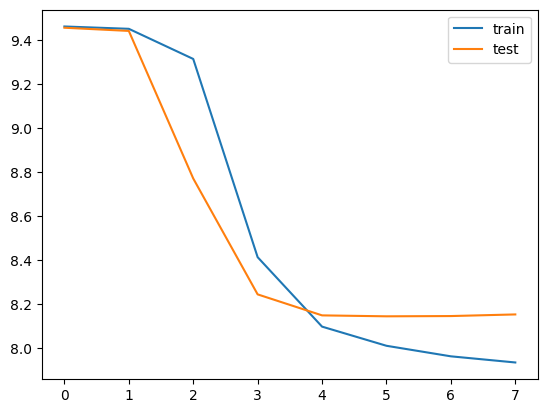

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# T5 with Sir's code

In [ ]:
MAX_INPUT_LENGTH = 1024
MIN_TARGET_LENGTH = 5
MAX_TARGET_LENGTH = 128
BATCH_SIZE = 8
LEARNING_RATE = 0.002
MAX_EPOCHS = 10
MODEL_CHECKPOINT = "t5-small" # Name of Model

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(MODEL_CHECKPOINT)

In [ ]:
if MODEL_CHECKPOINT in ["t5-small", "t5-base"]:
  prefix = "summarize: "
else:
  prefix = ""

In [ ]:
# #Preprocessing
# def preprocess_function(examples):
#   inputs = [prefix + doc for doc in examples["content"]]
#   model_inputs = tokenizer(inputs, max_length=MAX_INPUT_LENGTH,truncation=True)
#   # Setup the tokenizer for targets
#   with tokenizer.as_target_tokenizer():
#     labels = tokenizer(
#     examples["title"], max_length=MAX_TARGET_LENGTH, truncation=True
#     )
#   model_inputs["labels"] = labels["input_ids"]
#   return model_inputs

In [ ]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 823
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   keyword     817 non-null    object
 1   url         817 non-null    object
 2   title       817 non-null    object
 3   content     817 non-null    object
 4   urlToImage  770 non-null    object
 5   author      732 non-null    object
dtypes: object(6)
memory usage: 44.7+ KB


In [ ]:
def preprocess_function(row):
    if 'content' in row and isinstance(row['content'], str):
        document = row['content']
        if MODEL_CHECKPOINT in ["t5-small", "t5-base"]:
            document = "summarize: " + document
        model_inputs = tokenizer(document, max_length=MAX_INPUT_LENGTH, truncation=True, padding="max_length", return_tensors="pt")
        if 'summary' in row and isinstance(row['summary'], str):
            with tokenizer.as_target_tokenizer():
                labels = tokenizer(row['summary'], max_length=MAX_TARGET_LENGTH, truncation=True, padding="max_length", return_tensors="pt")
            model_inputs["labels"] = labels["input_ids"]
        return model_inputs
    else:
        return {}


In [ ]:
# def preprocess_function(row):
#     # Check if the 'content' column exists and is a non-empty string
#     if 'content' in row and isinstance(row['content'], str):
#         document = row['content']
#         # Prefix if needed
#         if MODEL_CHECKPOINT in ["t5-small", "t5-base"]:
#             document = "summarize: " + document
#         # Tokenize the document
#         model_inputs = tokenizer(document, max_length=4000, truncation=True)
#         # Setup the tokenizer for targets (if you have a 'summary' column)
#         if 'summary' in row and isinstance(row['summary'], str):
#             with tokenizer.as_target_tokenizer():
#                 labels = tokenizer(row['summary'], max_length=4000, truncation=True)
#             model_inputs["labels"] = labels["input_ids"]
#         return model_inputs
#     else:
#         return {}


In [ ]:
tokenized_train = train.apply(preprocess_function, axis=1)
tokenized_test = test.apply(preprocess_function, axis=1)

In [ ]:
model = AutoModelForSeq2SeqLM.from_pretrained(MODEL_CHECKPOINT)
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [ ]:
# Get the model name
model_name = MODEL_CHECKPOINT.split("/")[-1]

# Define training arguments
args = Seq2SeqTrainingArguments(
    f"{model_name}-finetuned",
    evaluation_strategy="steps",  # Set to "steps" for training without evaluation
    learning_rate=0.0001,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=10,
    predict_with_generate=True,
    fp16=True
)

In [ ]:
import accelerate
accelerate.__version__

'0.24.0'

In [ ]:
# Define input_shape as a tuple with two values
input_shape = (8, seq_length)


NameError: ignored

In [ ]:
# Create the Seq2SeqTrainer and train the model
trainer = Seq2SeqTrainer(
    model.to(device),
    args,
    train_dataset=tokenized_train,
    data_collator=data_collator,
    tokenizer=tokenizer
)

trainer.train()

ValueError: ignored

# Testing

In [ ]:
# new_content = "New news article content goes here"

# # Generate a summary (Y)
# generated_summary = model.generate_summary(new_content)

# # Find the original URL associated with the content
# original_url = df[df['content'] == new_content]['url'].values[0]

# # Display the summary and URL
# print("Generated Summary:", generated_summary)
# print("Original URL:", original_url)


In [ ]:
random_row = train_data.sample(n=1)

# later

In [ ]:
# metric = load_metric("rouge")

In [ ]:
# # Define the compute_metrics function
# def compute_metrics(eval_pred):
#     predictions, labels = eval_pred
#     preds = np.where(predictions != -100, predictions, tokenizer.pad_token_id)
#     decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)

#     # Replace -100 in the labels as we can't decode them.
#     labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
#     decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

#     # Rouge expects a newline after each sentence
#     decoded_preds = ["\n".join(nltk.sent_tokenize(pred.strip())) for pred in decoded_preds]
#     decoded_labels = ["\n".join(nltk.sent_tokenize(label.strip())) for label in decoded_labels]

#     result = metric.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)

#     # Extract a few results
#     result = {key: value.mid.fmeasure * 100 for key, value in result.items()}

#     # Add mean generated length
#     prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in predictions]
#     result["gen_len"] = np.mean(prediction_lens)

#     return {k: round(v, 4) for k, v in result.items()}


In [ ]:
# def compute_metrics(eval_pred, df, generated_col, reference_col):
#     predictions, labels = eval_pred
#     preds = np.where(predictions != -100, predictions, tokenizer.pad_token_id)
#     decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)

#     # Replace -100 in the labels as we can't decode them.
#     labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
#     decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

#     # Rouge expects a newline after each sentence
#     decoded_preds = ["\n".join(nltk.sent_tokenize(pred.strip())) for pred in decoded_preds]
#     decoded_labels = ["\n".join(nltk.sent_tokenize(label.strip())) for label in decoded_labels]

#     references = train_data[reference_col].tolist()

#     result = metric.compute(predictions=decoded_preds, references=references, use_stemmer=True)

#     # Extract a few results
#     result = {key: value.mid.fmeasure * 100 for key, value in result.items()}

#     # Add mean generated length
#     prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in predictions]
#     result["gen_len"] = np.mean(prediction_lens)

#     return {k: round(v, 4) for k, v in result.items()}


In [ ]:
if torch.cuda.is_available():
  device = torch.device("cuda")
  print("GPU is available and being used")
else:
  device = torch.device("cpu")
  print("GPU is not available, using CPU instead")

GPU is available and being used


In [ ]:
model_name = MODEL_CHECKPOINT.split("/")[-1]
#model = model_name.to(device)
args = Seq2SeqTrainingArguments(
  f"{model_name}-finetuned",
  evaluation_strategy = "epoch",
  learning_rate=0.001,
  per_device_train_batch_size=32,
  per_device_eval_batch_size=32,
  weight_decay=0.01,
  save_total_limit=3,
  num_train_epochs=10,
  predict_with_generate=True,
  fp16=True
)

In [ ]:
import accelerate
accelerate.__version__

'0.24.0'

In [ ]:
len(train_data)

571

In [ ]:
trainer = Seq2SeqTrainer(
  model.to(device),
  args,
  train_dataset=tokenized_train,
  eval_dataset=tokenized_test,
  data_collator=data_collator,
  tokenizer=tokenizer,
  compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

KeyError: ignored

In [ ]:
predict_results = trainer.predict(tokenized_test,max_length=128, num_beams=3)

KeyError: ignored

In [ ]:
if args.predict_with_generate:

  preds = np.where(predict_results.predictions != -100, predict_results.predictions, tokenizer.pad_token_id)
  predictions = tokenizer.batch_decode(preds, skip_special_tokens=True,clean_up_tokenization_spaces=True)
  predictions = [pred.strip() for pred in predictions]

NameError: ignored

In [ ]:
test['summary'][:2]

['Three men accused of involvement in the murder of a Scottish woman in Mauritius have returned to the crime scene as part of the police investigation.',
 'Covering costs of sending children back to school has left almost a fifth of Northern Ireland parents cutting their spending on food, a survey has found.']

In [ ]:
# Assuming you have a DataFrame named train_data
eval_predictions = trainer.predict(tokenized_test, max_length=128, num_beams=3)
metrics = compute_metrics(eval_predictions, train_data, 'content', 'summary')

NameError: ignored

In [ ]:
predictions[:2]

NameError: ignored

In [ ]:

# t5 = "t5-small"  # You can choose a different T5 model if needed
# tokenizer = T5Tokenizer.from_pretrained(t5)
# model = T5ForConditionalGeneration.from_pretrained(t5)

# # Create an empty list to store the generated summaries
# summarizd = []
# summarizd=test
# # Iterate through the articles in your dataset
# for index, row in train.iterrows():
#     news_content = row['content']

#     # Preprocess and tokenize the news article
#     inputs = tokenizer.encode("summarize: " + news_content, return_tensors="pt", max_length=512, truncation=True)

#     # Perform inference with the T5 model
#     with torch.no_grad():
#         summary_ids = model.generate(
#             inputs,
#             max_length=150,  # You can adjust this as needed
#             min_length=40,   # You can adjust this as needed
#             length_penalty=2.0,  # You can adjust this as needed
#             num_beams=4,  # You can adjust this as needed
#             early_stopping=True
#         )

#     # Decode the summary from the generated IDs
#     summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

#     # Append the generated summary to the list
#     summarizd.append(summary)

# # Now, your 'summarizd' list contains T5-generated summaries


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.1 MB/s eta 0:00:00


ImportError: ignored